In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
production_data = pd.read_csv('production_data.csv')
sales_data = pd.read_csv('sales_data.csv')
inventory_data = pd.read_csv('inventory_data.csv')

In [4]:
# konversi kolom 'Month' column ke format datetime
production_data['Month'] = pd.to_datetime(production_data['Month'])
sales_data['Month'] = pd.to_datetime(sales_data['Month'])
inventory_data['Month'] = pd.to_datetime(inventory_data['Month'])

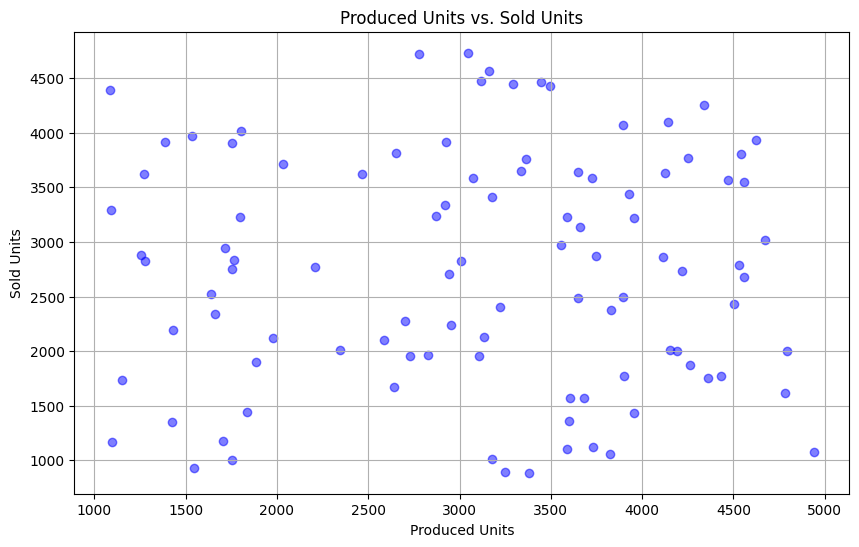

In [5]:
# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(production_data['Produced_Units'], sales_data['Sold_Units'], color='blue', alpha=0.5)
plt.title('Produced Units vs. Sold Units')
plt.xlabel('Produced Units')
plt.ylabel('Sold Units')
plt.grid(True)
plt.show()

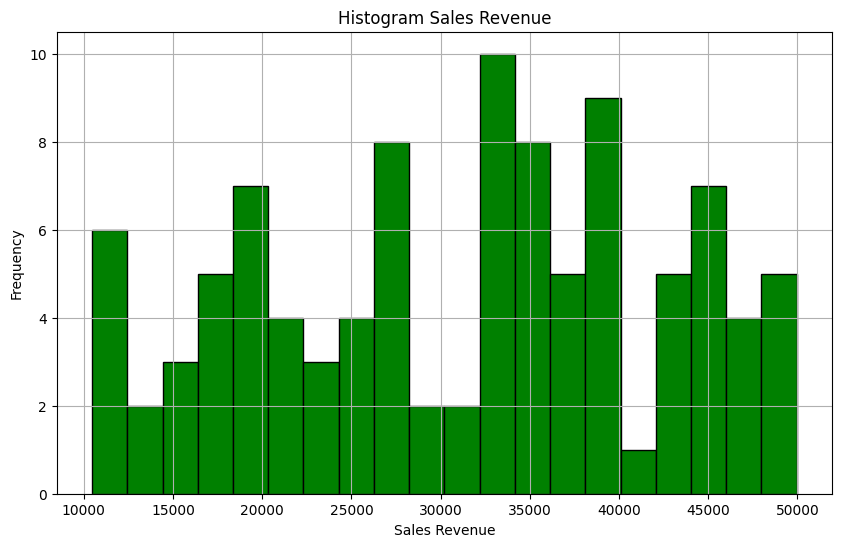

In [6]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(sales_data['Sales_Revenue'], bins=20, color='green', edgecolor='black')
plt.title('Histogram Sales Revenue')
plt.xlabel('Sales Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

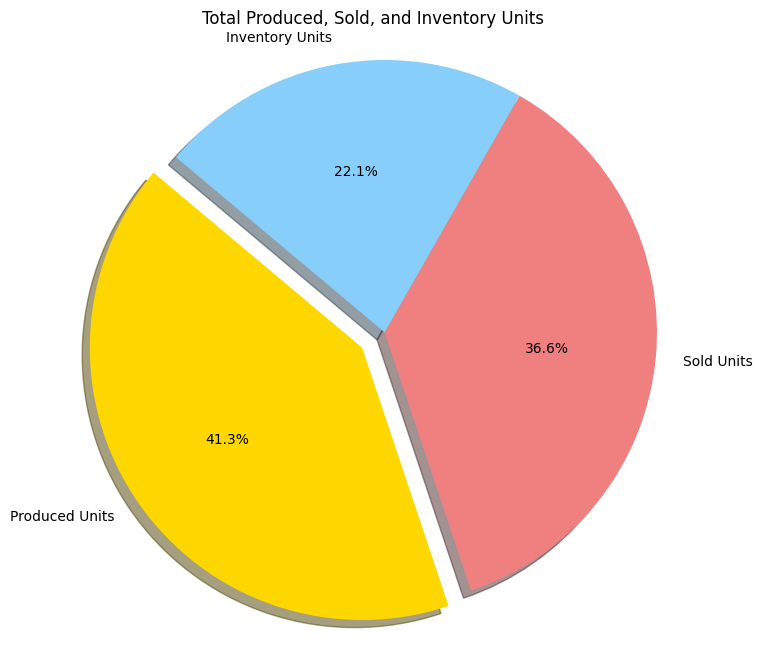

In [8]:
# Pie Chart
total_produced = production_data['Produced_Units'].sum()
total_sold = sales_data['Sold_Units'].sum()
total_inventory = inventory_data['Inventory_Units'].sum()

plt.figure(figsize=(8, 8))
labels = 'Produced Units', 'Sold Units', 'Inventory Units'
sizes = [total_produced, total_sold, total_inventory]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Total Produced, Sold, and Inventory Units')
plt.axis('equal')
plt.show()

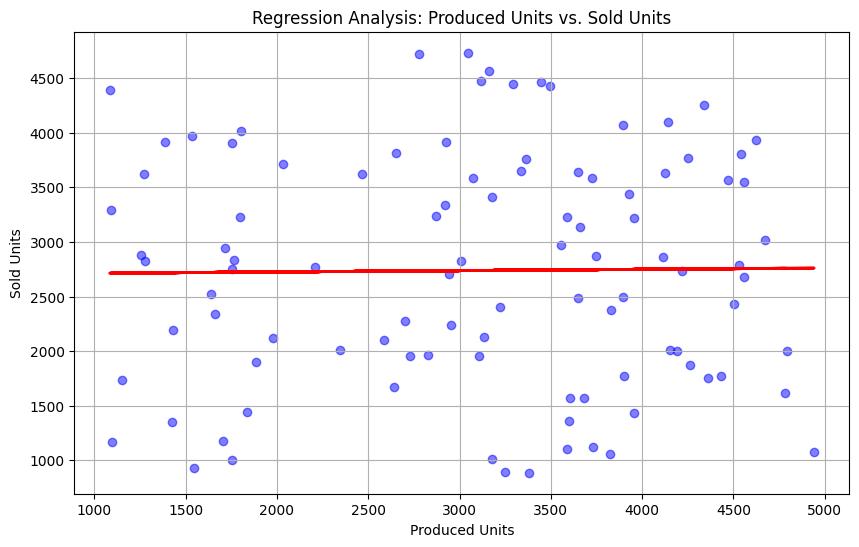

In [10]:
# Regression Analysis: Produced Units vs. Sold Units
X = production_data['Produced_Units'].values.reshape(-1, 1)
y = sales_data['Sold_Units'].values

reg_model = LinearRegression()
reg_model.fit(X, y)
y_pred = reg_model.predict(X)

# regression line
plt.figure(figsize=(10, 6))
plt.scatter(production_data['Produced_Units'], sales_data['Sold_Units'], color='blue', alpha=0.5)
plt.plot(production_data['Produced_Units'], y_pred, color='red', linewidth=2)
plt.title('Regression Analysis: Produced Units vs. Sold Units')
plt.xlabel('Produced Units')
plt.ylabel('Sold Units')
plt.grid(True)
plt.show()

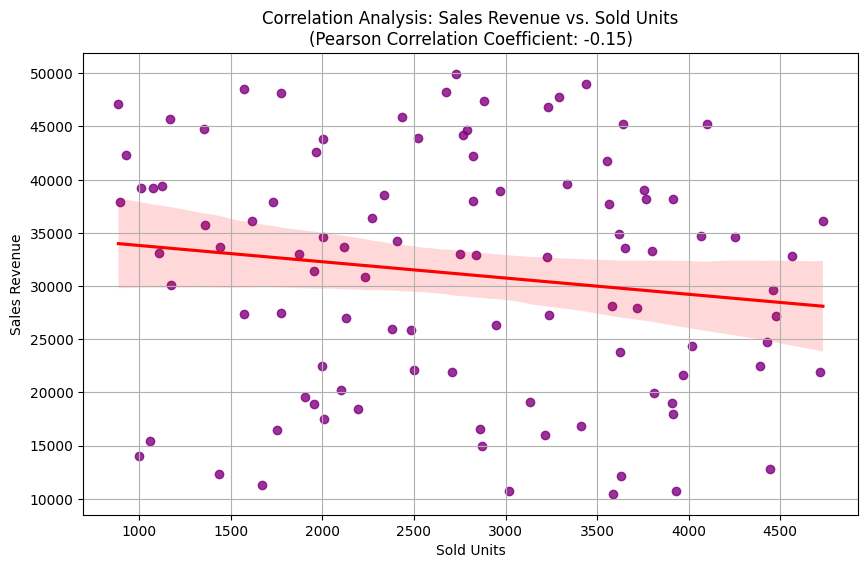

In [12]:
# Correlation Analysis: Sales Revenue vs. Sold Units
correlation = sales_data['Sales_Revenue'].corr(sales_data['Sold_Units'])

plt.figure(figsize=(10, 6))
sns.regplot(x=sales_data['Sold_Units'], y=sales_data['Sales_Revenue'], scatter_kws={'color':'purple'}, line_kws={'color':'red'})
plt.title(f'Correlation Analysis: Sales Revenue vs. Sold Units\n(Pearson Correlation Coefficient: {correlation:.2f})')
plt.xlabel('Sold Units')
plt.ylabel('Sales Revenue')
plt.grid(True)
plt.show()

1. Analisis Regresi: Apa hubungan antara unit yang diproduksi dan unit yang terjual? Dapatkah jumlah unit yang terjual berdasarkan jumlah unit yang diproduksi di prediksi?
  - Scatterplot dan garis regresi menunjukkan hubungan linier antara unit yang diproduksi dan unit yang terjual. Garis merah menunjukkan garis yang paling sesuai, yang menunjukkan bagaimana perubahan dalam unit yang diproduksi terkait dengan perubahan dalam unit yang terjual.


2. Analisis Korelasi: Apakah terdapat korelasi yang signifikan antara pendapatan penjualan dan jumlah unit yang terjual?
  - Scatterplot dengan garis regresi menunjukkan hubungan antara pendapatan penjualan dan unit terjual. Koefisien korelasi Pearson ditampilkan pada judul, yang menunjukkan kekuatan dan arah hubungan. Korelasi positif berarti bahwa dengan meningkatnya jumlah unit yang terjual, pendapatan penjualan juga cenderung meningkat.